# Overwiew

## Summary

In [10]:
import pandas as pd

df = pd.read_csv("../data/data.csv", delimiter=",")
df

,id,gender,customer_senior,customer_partner,dependent_family,month_tenure,phone_subscription,multiple_line,internet_type,online_security,...,device_protection_plan,techinal_support,streaming_tv,streaming_movie,contract_type,paperless_billing,payment_method_type,amount_charges_monthly,amount_total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7043 non-null   object 
 1   gender                  7043 non-null   object 
 2   customer_senior         7043 non-null   int64  
 3   customer_partner        7043 non-null   object 
 4   dependent_family        7043 non-null   object 
 5   month_tenure            7043 non-null   int64  
 6   phone_subscription      7043 non-null   object 
 7   multiple_line           7043 non-null   object 
 8   internet_type           7043 non-null   object 
 9   online_security         7043 non-null   object 
 10  backup_service_online   7043 non-null   object 
 11  device_protection_plan  7043 non-null   object 
 12  techinal_support        7043 non-null   object 
 13  streaming_tv            7043 non-null   object 
 14  streaming_movie         7043 non-null   

In [12]:
print(f"Number of companies churned: {df["churn"].map({"Yes": 1, "No": 0}).sum()} over {df["churn"].count()}")

Number of companies churned: 1869 over 7043


## Duplicates

In [13]:
# Check for duplicates in ID
duplicates = df["id"].duplicated().any()
duplicates

False

## Missing values

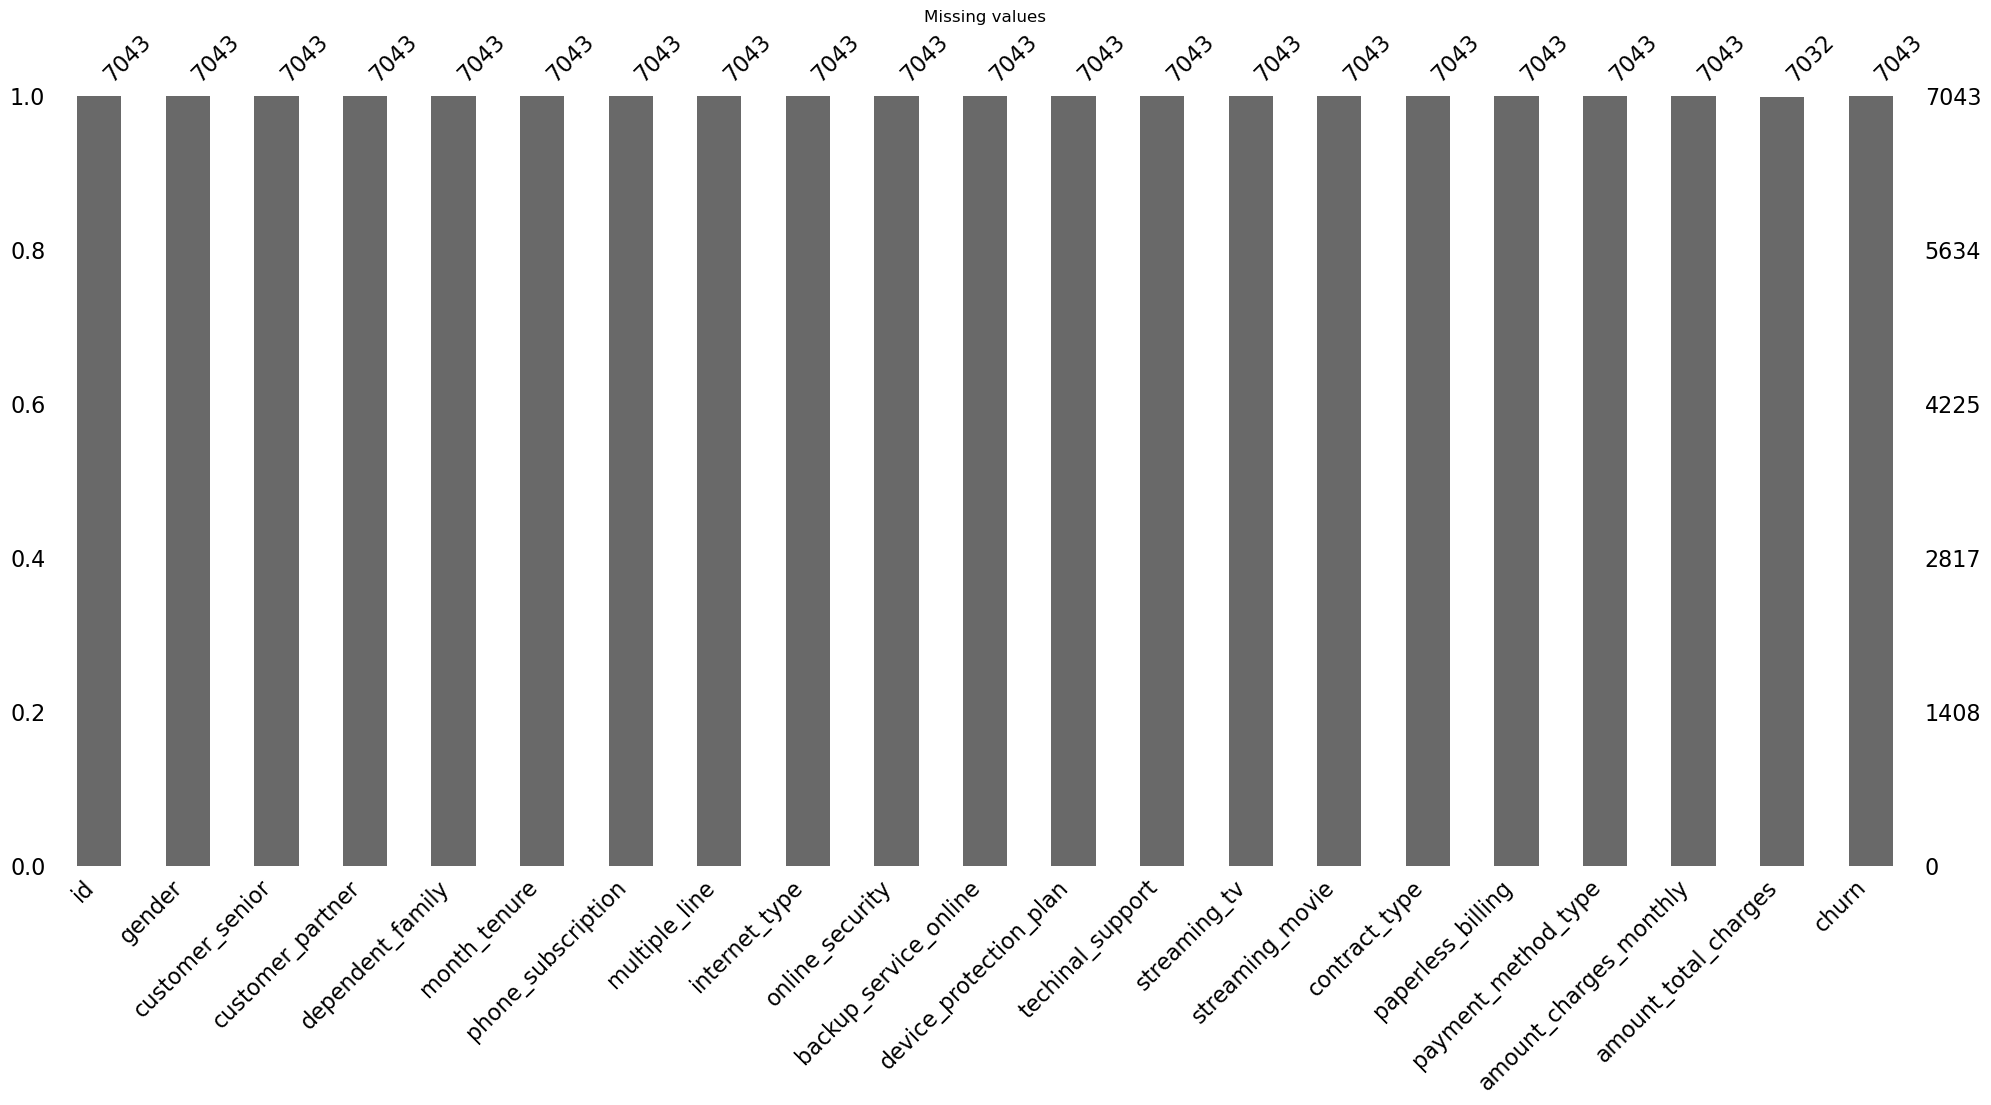

In [14]:
# Check for missing values
import missingno as msno
import matplotlib.pyplot as plt 

msno.bar(df)
plt.title("Missing values")
plt.show()

## Feature distributions

Defining the column lists

In [15]:
import numpy as np

df_shorten = df.drop(columns=["id", "churn"])
df_shorten = df_shorten.astype({"customer_senior": "object"})

cat_columns = [col for col in df_shorten.select_dtypes(include=np.object_).columns][1:-1]
num_columns = [col for col in df_shorten.select_dtypes(include=[np.int64, np.float64]).columns]
print(f"Total features: {len(df_shorten.columns)}\nCategorical features: {len(cat_columns)}\nNumerical features: {len(num_columns)}\n`id` and `churn` are excluded from these lists.")

Total features: 19
Categorical features: 14
Numerical features: 3
`id` and `churn` are excluded from these lists.


### Mapping

In [16]:
mapping_dict = {
    "gender": {
        "Male": 1,
        "Female": 0
    },
    "internet_type": {
        "Fiber optic": 2,
        "DSL": 1,
        "No": 0
    },
    "contract_type": {
        "Two year": 2,
        "One year": 1,
        "Month-to-month": 0
    },
    "payment_method_type": {
        "Electronic check": 3,
        "Mailed check": 2,
        "Bank transfer (automatic)": 1,
        "Credit card (automatic)": 0
    },
    "multiple_line" : {
        "Yes": 2,
        "No": 1,
        "No phone service": 0
    },
    "binary": {
        "Yes": 1,
        "No": 0
    },
    "multiple" : {
        "Yes": 2,
        "No": 1,
        "No internet service": 0
    }
}

In [17]:
df_mapped = df.copy()

for col in df_mapped:
    if col == "customer_senior":
        pass
    elif col in mapping_dict.keys():
        df_mapped[col] = df_mapped[col].map(mapping_dict[col])
    else:
        if df_mapped[col].nunique() == 2:
            df_mapped[col] = df_mapped[col].map(mapping_dict["binary"])
        elif df_mapped[col].nunique() == 3:
            df_mapped[col] = df_mapped[col].map(mapping_dict["multiple"])

df_mapped

,id,gender,customer_senior,customer_partner,dependent_family,month_tenure,phone_subscription,multiple_line,internet_type,online_security,...,device_protection_plan,techinal_support,streaming_tv,streaming_movie,contract_type,paperless_billing,payment_method_type,amount_charges_monthly,amount_total_charges,churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,1,...,1,1,1,1,0,1,3,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,1,1,2,...,2,1,1,1,1,0,2,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,1,1,2,...,1,1,1,1,0,1,2,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,2,...,2,2,1,1,1,0,1,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,1,2,1,...,1,1,1,1,0,1,3,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,1,2,...,2,2,2,2,1,1,2,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,2,2,1,...,2,1,2,2,1,1,0,103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,0,1,2,...,1,1,1,1,0,1,3,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,2,1,...,1,1,1,1,0,1,2,74.40,306.60,1


### Correlation matrix

In [18]:
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

cor_matrix = df_mapped.drop(columns='id').corr().round(2)

fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"type": "heatmap"}]])

fig.add_trace(go.Heatmap(z=cor_matrix.values, x=cor_matrix.columns, y=cor_matrix.columns, colorscale='Viridis'), row=1, col=1)

fig.update_layout(title='Correlation Matrix', width=700, height=700, template="plotly_dark")
fig.show()

**Some coments on the correlation matrix :**

> *Some correlations are hard to interpret because of the categorical variables, but still it helps us to understand the link between the variables and to highlit them.*

- `streaming_movie` and `streaming_tv`: strong positive correlation (0.81), the kind of service is the same. We could assume that having access to one of those services implies having access to the other one.
- all the features related to the internet services are highly correlated.
- `contract_type` and `month_tenure`: strong positive correlation (0.67), if the contract of a customer is 2 years it is therefore logical that the number of total months the customer has been with the company increase.
- `month_tenure` and `amount_total_charges`: strong positive correlation (0.83), the number of months spent by a customer in the company will therefore increase the total amout of charges of the customer.
- `amount_charges_monthly` and `amount_total_charges` : strong positive correlation (0.65), we can think about a direct relation between `amout_total_charges` and `month_tenure` X `amount_charges_monthly`.
- `multiple_lines` and `phone_subscription`: in the possible answers for `multiple_lines` there is the option "No phone service" which highly relates to the second feature.

### Numerical variables

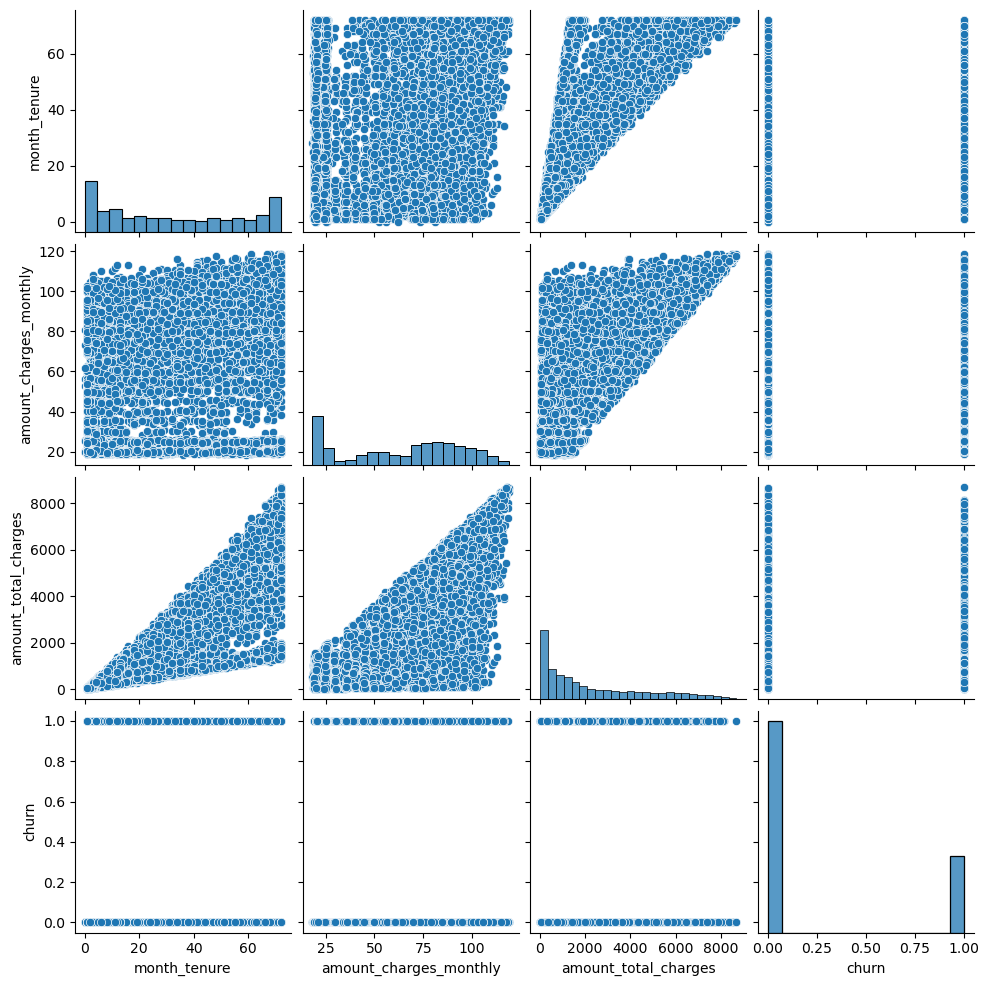

In [19]:
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na option is deprecated.*")

col = num_columns + ["churn"]

sns.pairplot(df_mapped[col])
plt.show()

In [20]:
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 

n_col = len(num_columns)
col_width = [1/n_col for i in range(n_col)]
col_spec = [{"type": "bar"} for i in range(n_col)]

fig = make_subplots(
    rows=1,
    cols=n_col,
    column_widths=col_width,
    specs=[col_spec]
)

for i in range(n_col):
    col = num_columns[i]
    fig.add_trace(go.Box(y=df[col], name=col, boxmean="sd"), row=1, col=i+1)

fig.update_layout(title="Numerical variables distributions", template="plotly_dark")
fig.update_xaxes(tickangle=45)
fig.show()


On our plot we can see that there are no outliers. We can be conforted by the fact that in `amount_total_charges` the maximum value is around  $8685$ and $1.5*(q3-q1)=8885$

### Categorical variables

/var/folders/kh/dhywcjbd5bl8k6pbqgkwmjrh0000gn/T/ipykernel_71402/3262048200.py:17: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



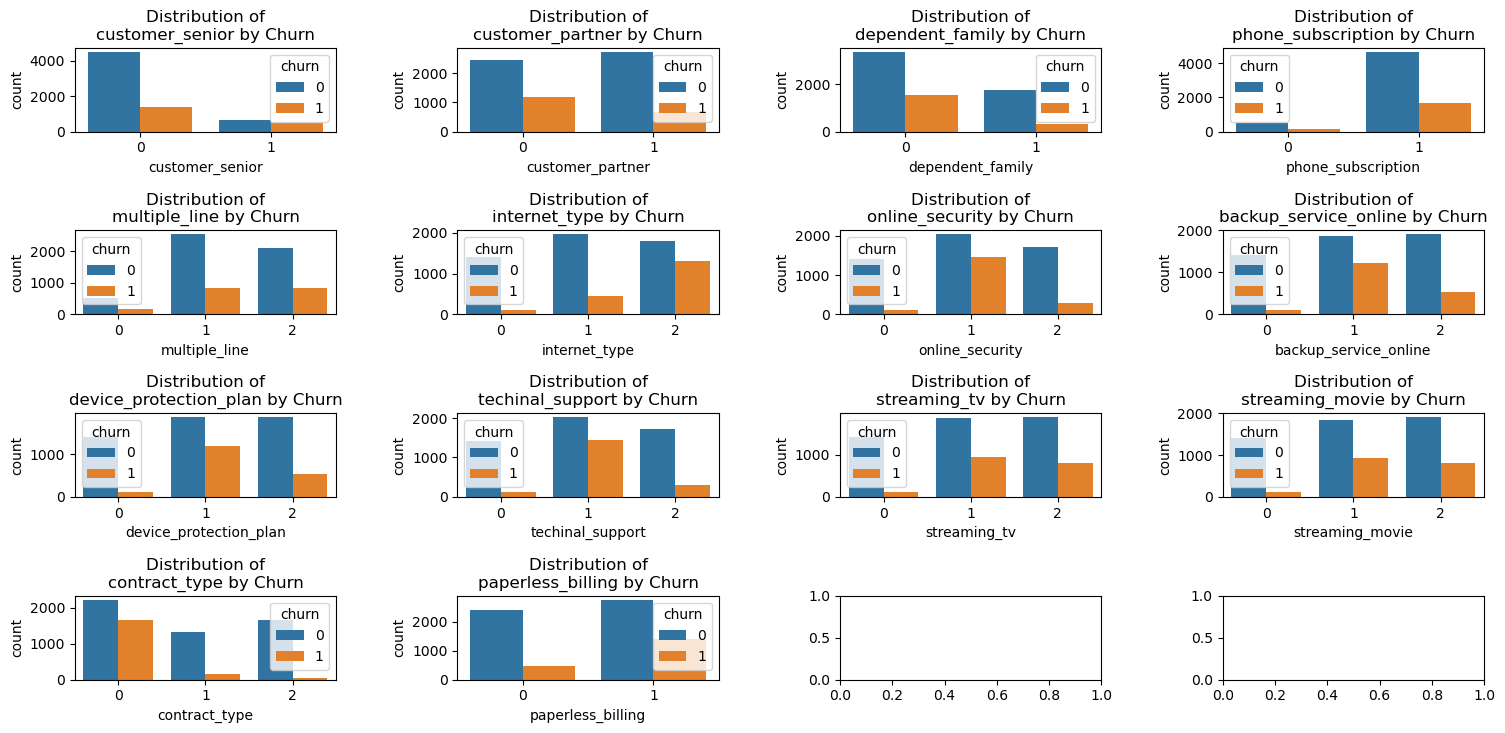

In [21]:
import seaborn as sns 
import matplotlib.pyplot as plt 

n_plots = len(cat_columns)
n_cols = 4
n_rows = (n_plots + n_cols-1) // n_cols

fig, ax = plt.subplots(n_rows, n_cols, figsize=(16,8), squeeze=False)
fig.tight_layout(pad=5.0)

for i, col in enumerate(cat_columns):
    row = i // n_cols
    col_pos = i % n_cols
    sns.countplot(x=col, hue="churn", data=df_mapped, ax=ax[row, col_pos])
    ax[row, col_pos].set_title(f"Distribution of\n{col} by Churn")

fig.show()

# Steps followed by the Pipeline script in `utils/preprocessing.py:`

#### Transform the column `senior_status`

In [22]:
reverse_mapping_dict = {
    1: "Yes",
    0: "No"
}

df["customer_senior"] = df["customer_senior"].map(reverse_mapping_dict)
df["customer_senior"]

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: customer_senior, Length: 7043, dtype: object

#### Drop redondant features


In [23]:
df.drop(columns=["amount_total_charges", "phone_subscription", "streaming_tv"], inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7043 non-null   object 
 1   gender                  7043 non-null   object 
 2   customer_senior         7043 non-null   object 
 3   customer_partner        7043 non-null   object 
 4   dependent_family        7043 non-null   object 
 5   month_tenure            7043 non-null   int64  
 6   multiple_line           7043 non-null   object 
 7   internet_type           7043 non-null   object 
 8   online_security         7043 non-null   object 
 9   backup_service_online   7043 non-null   object 
 10  device_protection_plan  7043 non-null   object 
 11  techinal_support        7043 non-null   object 
 12  streaming_movie         7043 non-null   object 
 13  contract_type           7043 non-null   object 
 14  paperless_billing       7043 non-null   

In [25]:
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

df_mapped = df.copy()

for col in df_mapped:
    if col in mapping_dict.keys():
        df_mapped[col] = df_mapped[col].map(mapping_dict[col])
    else:
        if df_mapped[col].nunique() == 2:
            df_mapped[col] = df_mapped[col].map(mapping_dict["binary"])
        elif df_mapped[col].nunique() == 3:
            df_mapped[col] = df_mapped[col].map(mapping_dict["multiple"])

cor_matrix = df_mapped.drop(columns='id').corr().round(2)

fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"type": "heatmap"}]])

fig.add_trace(go.Heatmap(z=cor_matrix.values, x=cor_matrix.columns, y=cor_matrix.columns, colorscale='Viridis'), row=1, col=1)

fig.update_layout(title='Correlation Matrix', width=700, height=700, template="plotly_dark")
fig.show()

#### Encode categorical variables

In [26]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop="first", sparse_output=False)

cat_columns = [col for col in df.select_dtypes(include=np.object_).columns][1:-1] # we drop id and churn columns here
print(cat_columns)

df_encoded = encoder.fit_transform(df[cat_columns])
df_encoded = pd.DataFrame(df_encoded, columns= encoder.get_feature_names_out(), index=df["id"])
df_encoded

['gender', 'customer_senior', 'customer_partner', 'dependent_family', 'multiple_line', 'internet_type', 'online_security', 'backup_service_online', 'device_protection_plan', 'techinal_support', 'streaming_movie', 'contract_type', 'paperless_billing', 'payment_method_type']


,gender_Male,customer_senior_Yes,customer_partner_Yes,dependent_family_Yes,multiple_line_No phone service,multiple_line_Yes,internet_type_Fiber optic,internet_type_No,online_security_No internet service,online_security_Yes,...,techinal_support_No internet service,techinal_support_Yes,streaming_movie_No internet service,streaming_movie_Yes,contract_type_One year,contract_type_Two year,paperless_billing_Yes,payment_method_type_Credit card (automatic),payment_method_type_Electronic check,payment_method_type_Mailed check
id,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5575-GNVDE,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3668-QPYBK,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7795-CFOCW,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9237-HQITU,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2234-XADUH,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4801-JZAZL,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


#### Scale numerical variables

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_columns = [col for col in df.select_dtypes(include=[np.int64, np.float64]).columns]
print(num_columns)
df_scaled = scaler.fit_transform(df[num_columns])
df_scaled = pd.DataFrame(data=df_scaled, columns=num_columns, index=df["id"])
df_scaled

['month_tenure', 'amount_charges_monthly']


,month_tenure,amount_charges_monthly
id,,
7590-VHVEG,-1.277445,-1.160323
5575-GNVDE,0.066327,-0.259629
3668-QPYBK,-1.236724,-0.362660
7795-CFOCW,0.514251,-0.746535
9237-HQITU,-1.236724,0.197365
...,...,...
6840-RESVB,-0.340876,0.665992
2234-XADUH,1.613701,1.277533
4801-JZAZL,-0.870241,-1.168632


In [28]:
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 

n_col = len(num_columns)
col_width = [1/n_col for i in range(n_col)]
col_spec = [{"type": "bar"} for i in range(n_col)]

fig = make_subplots(
    rows=1,
    cols=n_col,
    column_widths=col_width,
    specs=[col_spec]
)

for i in range(n_col):
    col = num_columns[i]
    fig.add_trace(go.Box(y=df_scaled[col], name=col, boxmean="sd"), row=1, col=i+1)

fig.update_layout(title="Scaled numerical variables distributions", template="plotly_dark")
fig.update_xaxes(tickangle=45)
fig.show()

# Model selection

Data loading and preparation

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import sys
import os

# Add the root directory to the path
sys.path.append(os.path.abspath(".."))

from utils.preprocessing_pipeline import create_preprocessing_pipeline

data = pd.read_csv("../data/data.csv", delimiter=",")
full_pipeline = create_preprocessing_pipeline(data)

X = data.drop(columns=["churn"])
y = data["churn"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
full_pipeline.fit(X_train, y_train)

# Transform the training data
X_train_transformed, y_train_transformed = full_pipeline.transform(X_train, y_train)

# Transform the test data
X_test_transformed, y_test_transformed = full_pipeline.transform(X_test, y_test)

# Keep the ids
id_train = X_train_transformed["id"]
X_train_transformed.drop(columns="id", inplace=True)

id_test = X_test_transformed["id"]
X_test_transformed.drop(columns="id", inplace=True)

# Verify the shapes
print("Training features shape:", X_train_transformed.shape)
print("Test features shape:", X_test_transformed.shape)

Training features shape: (5624, 27)
Test features shape: (1408, 27)


In [30]:
X_train_transformed

,customer_senior_Yes,gender_Male,customer_partner_Yes,dependent_family_Yes,multiple_line_No phone service,multiple_line_Yes,internet_type_Fiber optic,internet_type_No,online_security_No internet service,online_security_Yes,...,streaming_movie_Yes,contract_type_One year,contract_type_Two year,paperless_billing_Yes,payment_method_type_Credit card (automatic),payment_method_type_Electronic check,payment_method_type_Mailed check,month_tenure,amount_charges_monthly,amount_total_charges
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.468357,-0.002049,-0.421730
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.883777,1.073455,1.254246
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.287832,-1.378428,-1.002101
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.164911,0.175817,-0.907313
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.041990,0.154207,-0.782078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.287832,1.000314,-0.970483
5620,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,-0.386409,0.870655,-0.041033
5621,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.837121,-1.454893,-0.877220
5622,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.837121,1.148258,-0.482116


## Clustering

Here we perfome clustering on the whole transformed dataset.

In [31]:
# Clustering on the full transformed dataset (combine train and test)
X_transformed = pd.concat([X_train_transformed, X_test_transformed], ignore_index=True)
id_column = pd.concat([id_train, id_test], ignore_index=True)
X_transformed

,customer_senior_Yes,gender_Male,customer_partner_Yes,dependent_family_Yes,multiple_line_No phone service,multiple_line_Yes,internet_type_Fiber optic,internet_type_No,online_security_No internet service,online_security_Yes,...,streaming_movie_Yes,contract_type_One year,contract_type_Two year,paperless_billing_Yes,payment_method_type_Credit card (automatic),payment_method_type_Electronic check,payment_method_type_Mailed check,month_tenure,amount_charges_monthly,amount_total_charges
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.468357,-0.002049,-0.421730
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.883777,1.073455,1.254246
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.287832,-1.378428,-1.002101
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.164911,0.175817,-0.907313
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.041990,0.154207,-0.782078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.293515,0.112650,0.922533
7028,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.760856,1.500665,1.500362
7029,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.632252,-1.496450,-0.866747
7030,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.498384,-0.696887,0.295608


#### Elbow Method

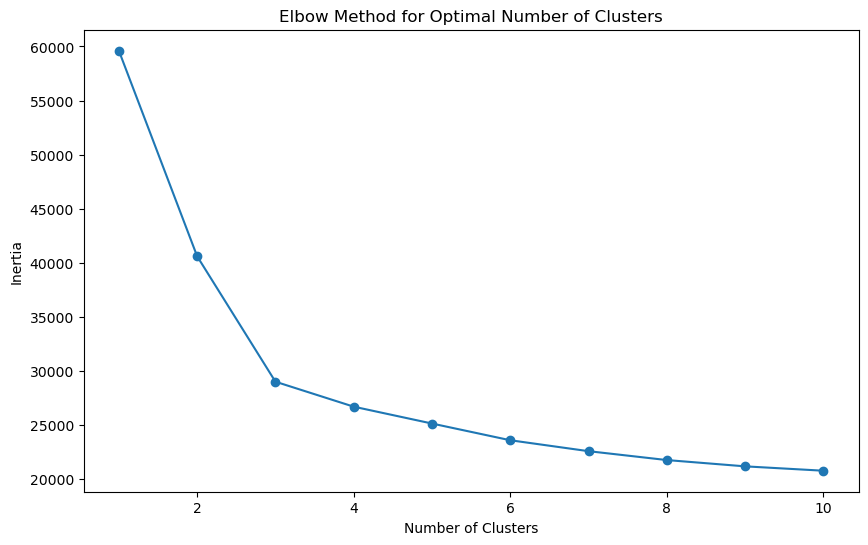

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, message=".*n_init.*")

# Calculate inertia for different numbers of clusters
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_transformed)
    inertia.append(kmeans.inertia_)

# Plot inertia (Elbow Method)
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

#### Silhouette Score

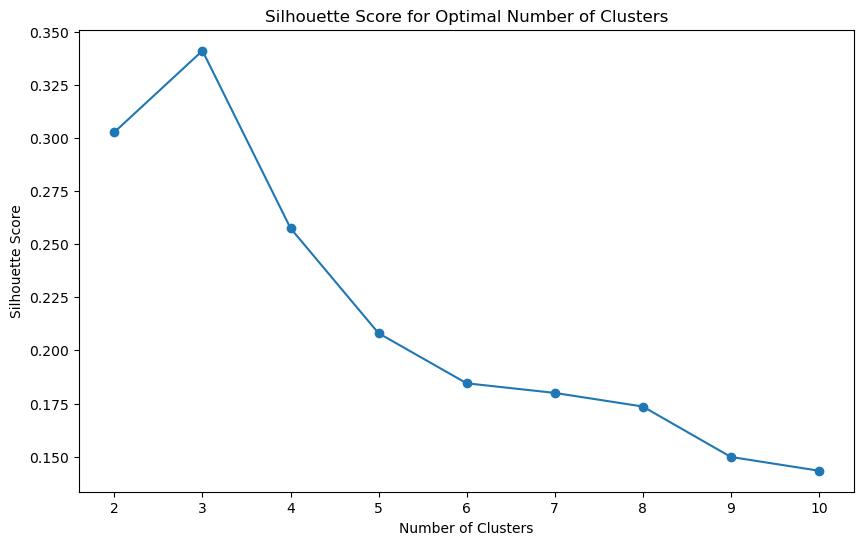

In [6]:
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*n_init.*")

# Calculate silhouette score for different numbers of clusters
silhouette_scores = []
for k in cluster_range[1:]:  # start from 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_transformed)
    silhouette_scores.append(silhouette_score(X_transformed, labels))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range[1:], silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

#### K-means

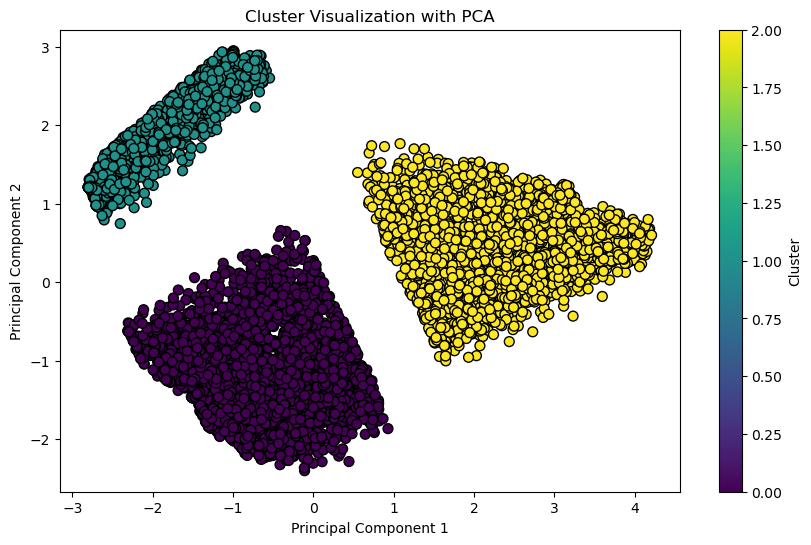

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_transformed)

X_transformed["cluster"] = clusters

# Reduce dimensions to 2 using PCA for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_transformed)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()


Cluster Summary (Mean):
          month_tenure  amount_charges_monthly  amount_total_charges
cluster                                                            
0           30.667763               21.076283            665.220329
1           15.312055               68.603579           1043.980400
2           57.751860               88.508228           5109.894551

Category distribution in cluster for gender:
cluster  gender
0        Male      0.509211
         Female    0.490789
1        Male      0.501394
         Female    0.498606
2        Male      0.506346
         Female    0.493654
Name: proportion, dtype: float64

Category distribution in cluster for customer_senior:
cluster  customer_senior
0        No                 0.965789
         Yes                0.034211
1        No                 0.801054
         Yes                0.198946
2        No                 0.803939
         Yes                0.196061
Name: proportion, dtype: float64

Category distribution in cluster for

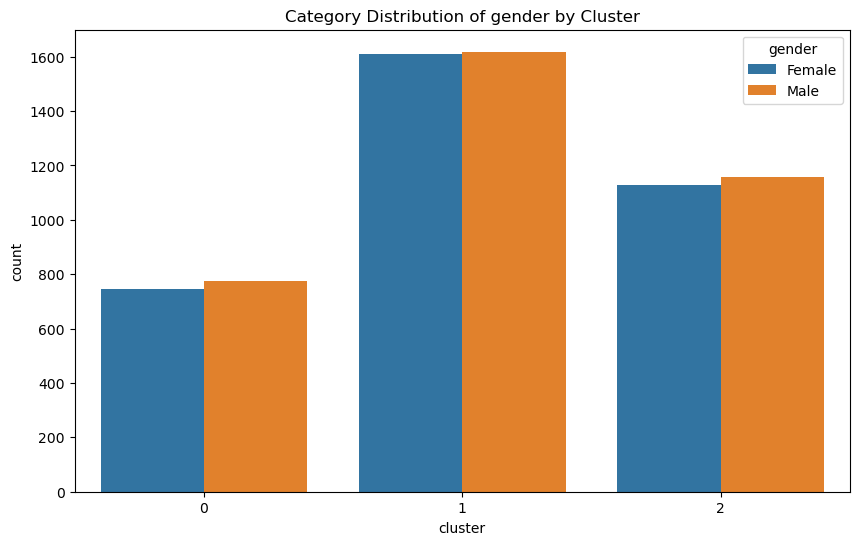

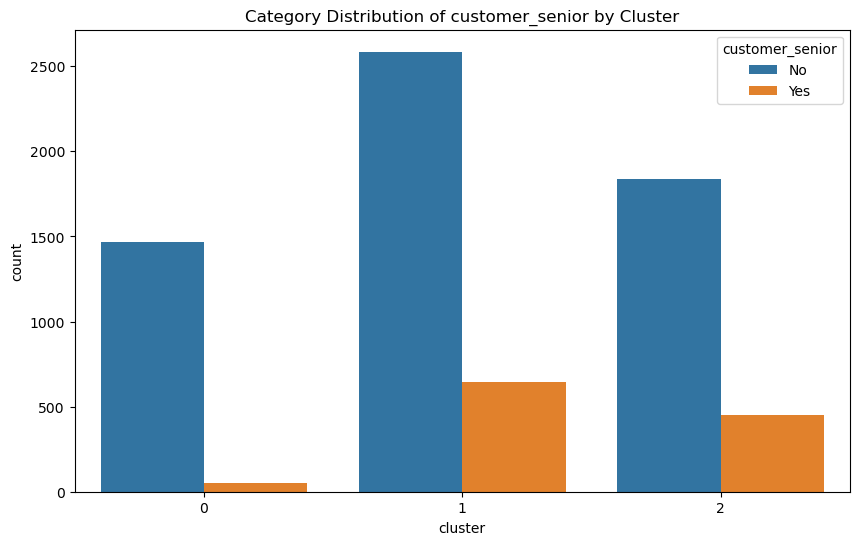

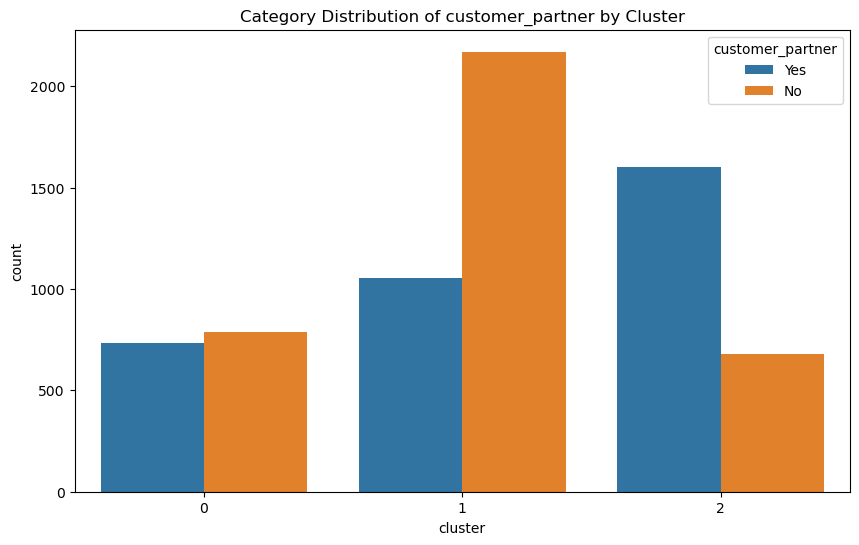

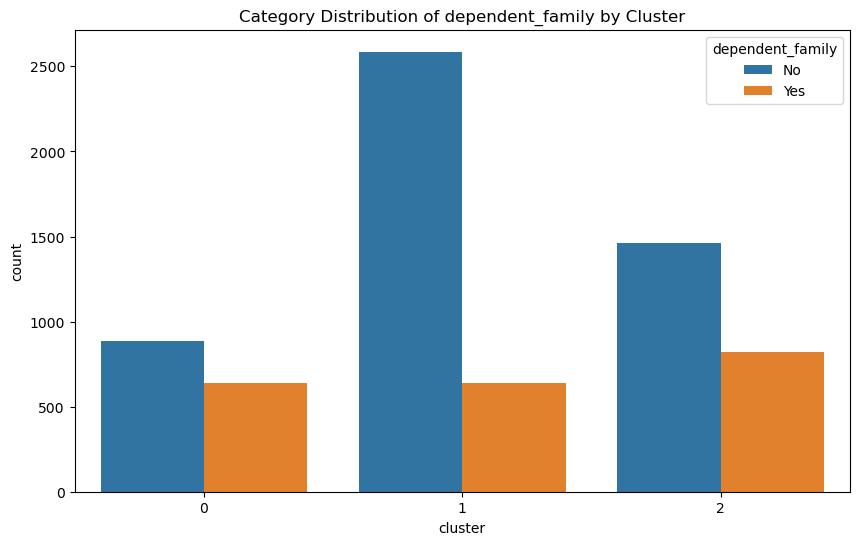

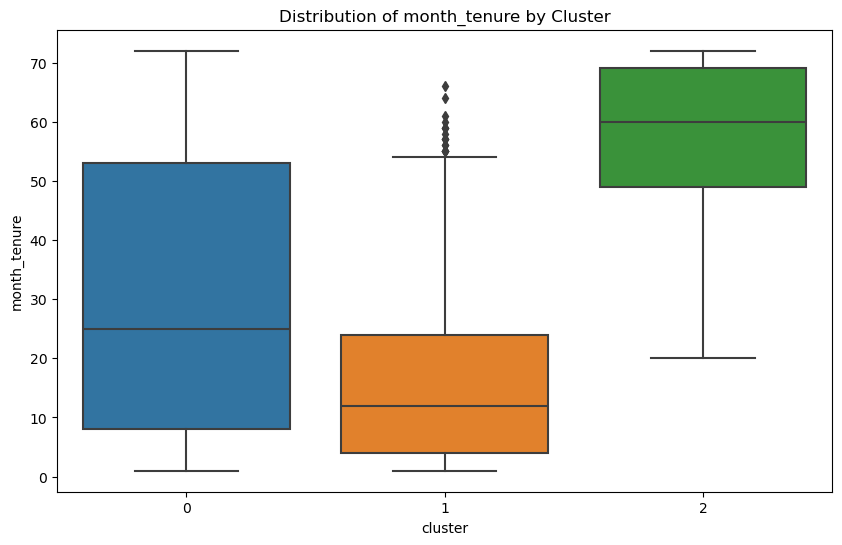

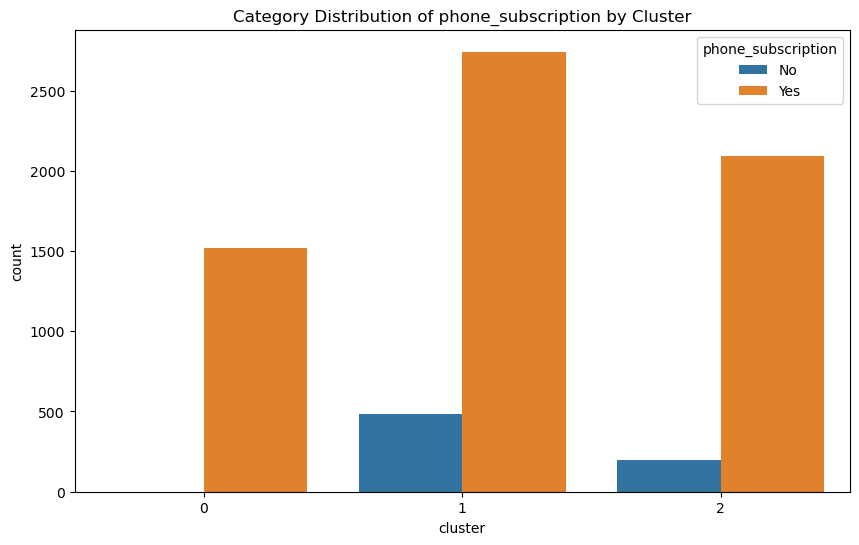

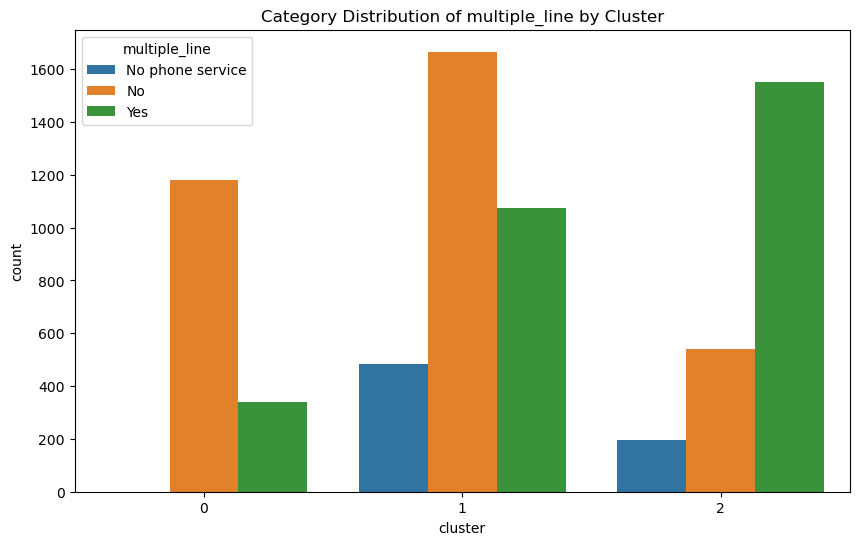

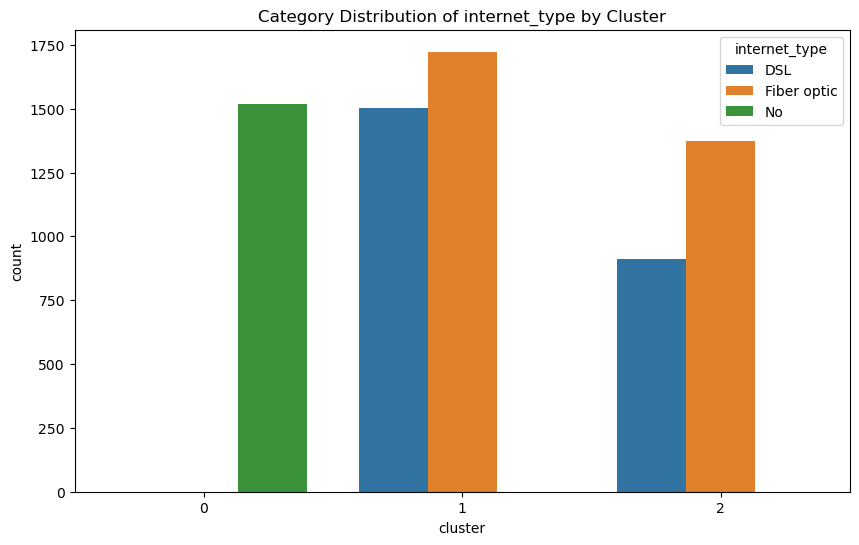

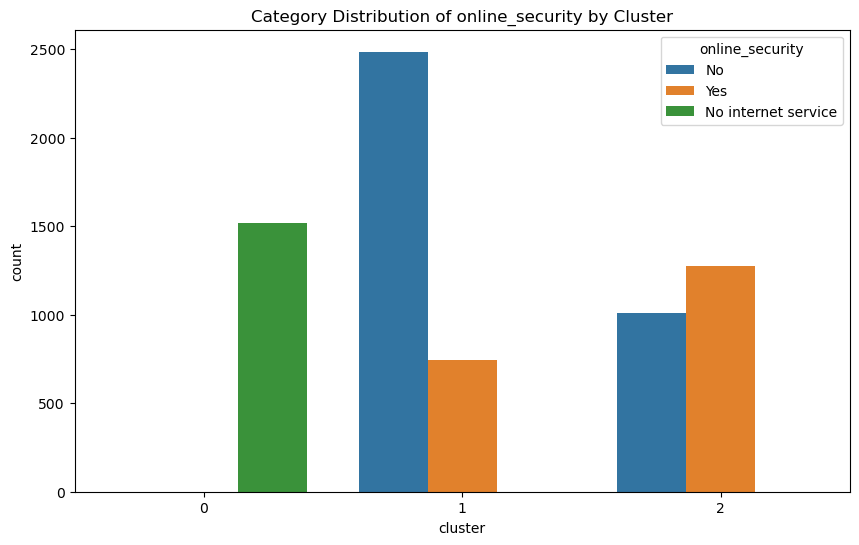

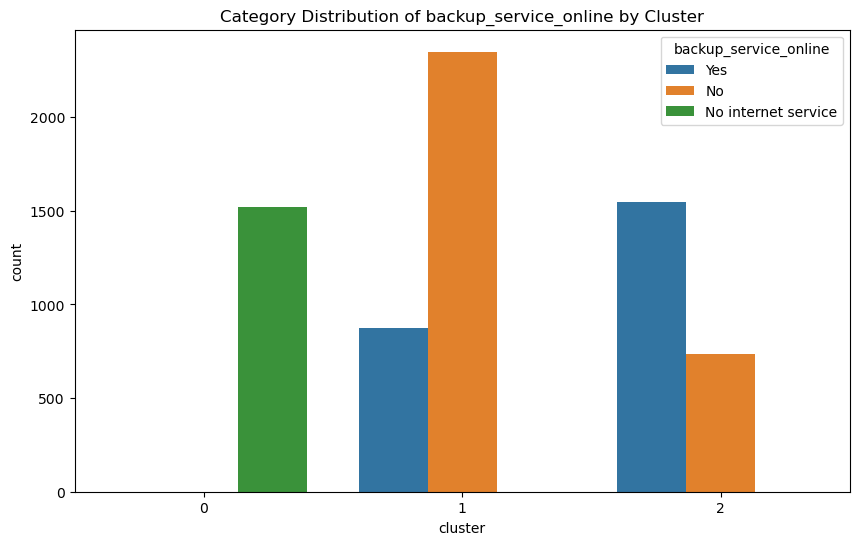

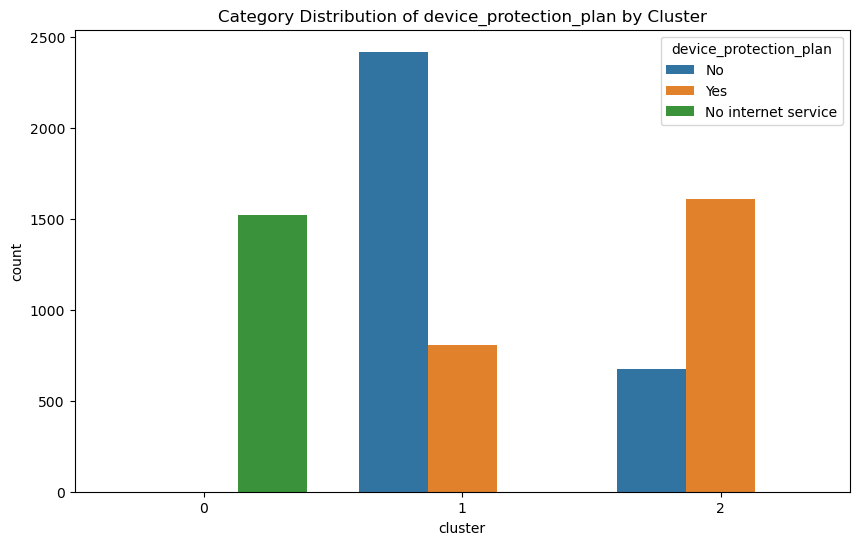

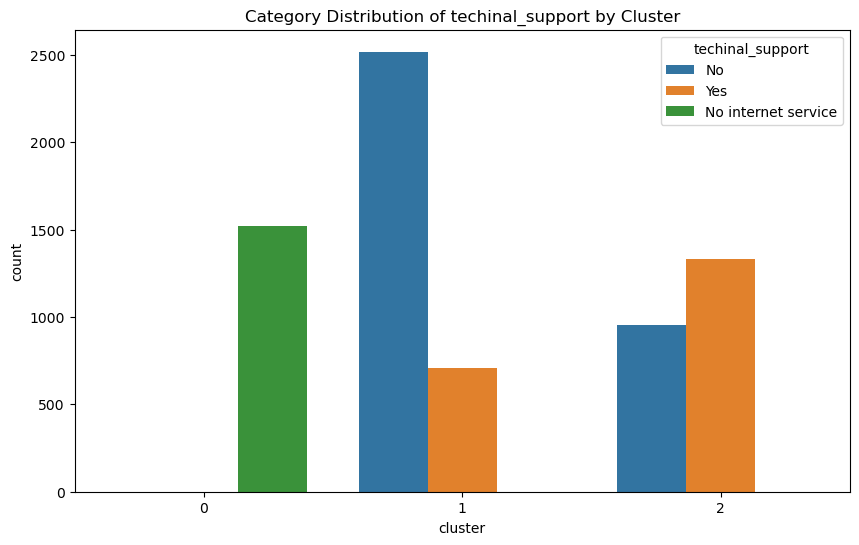

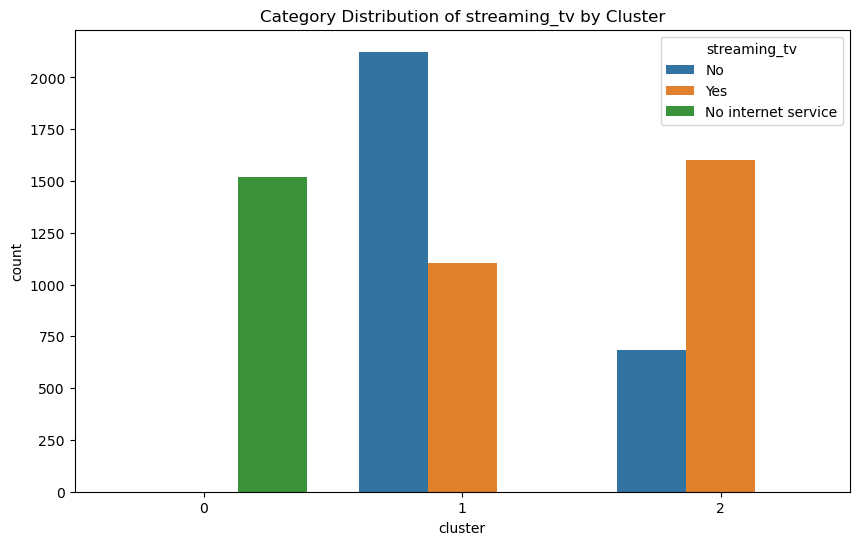

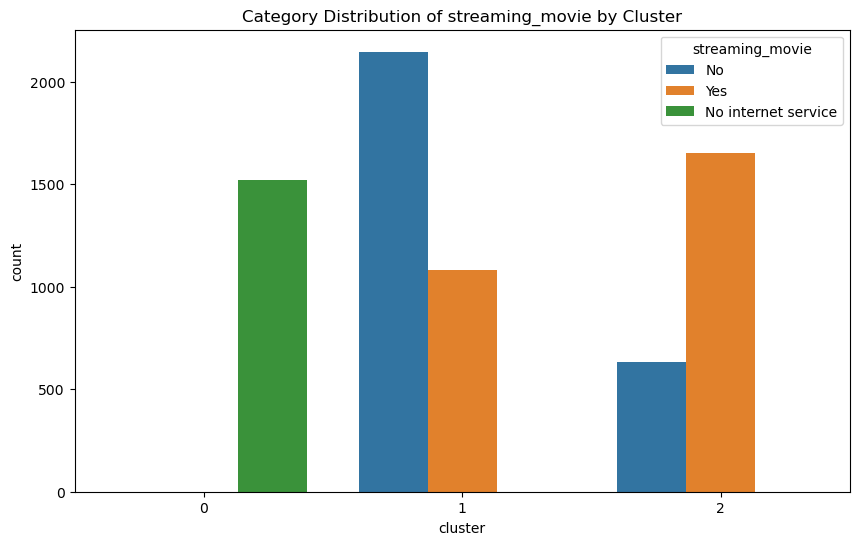

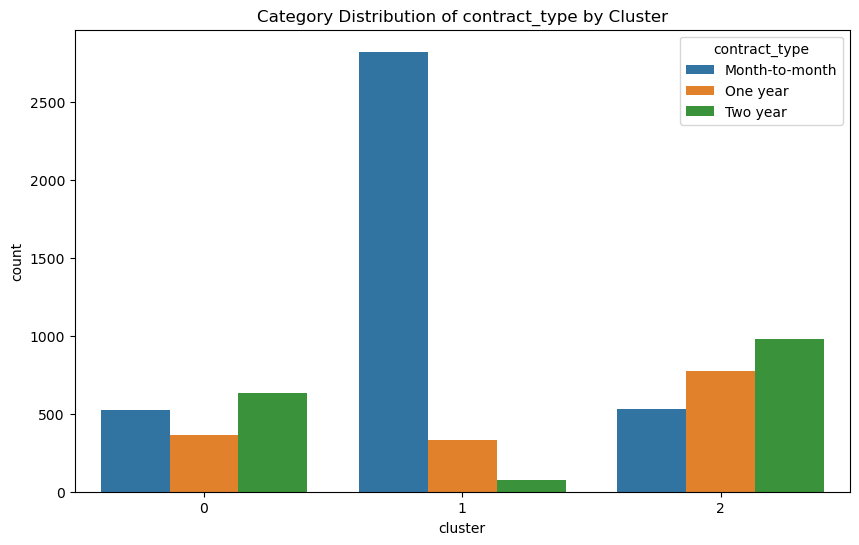

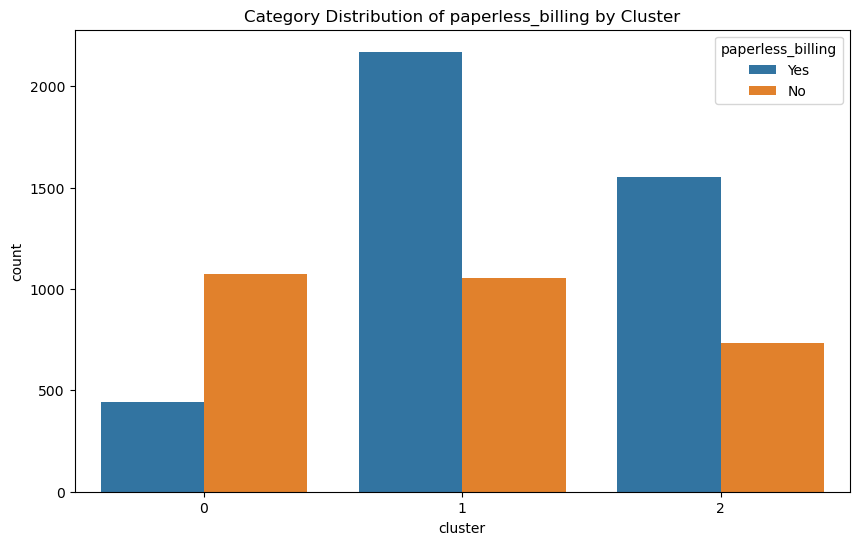

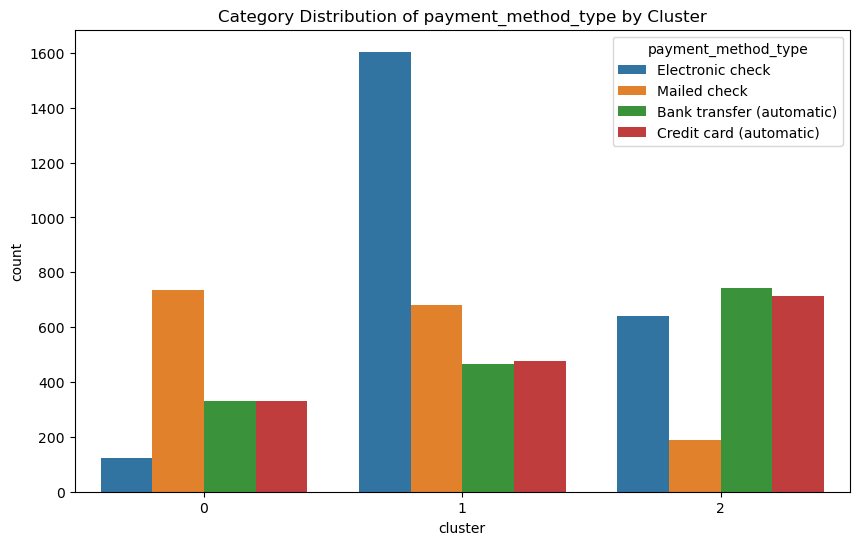

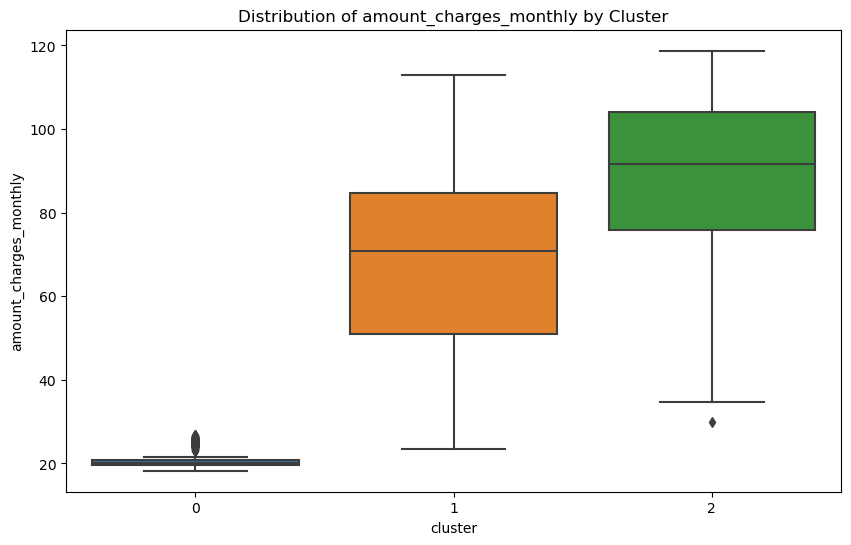

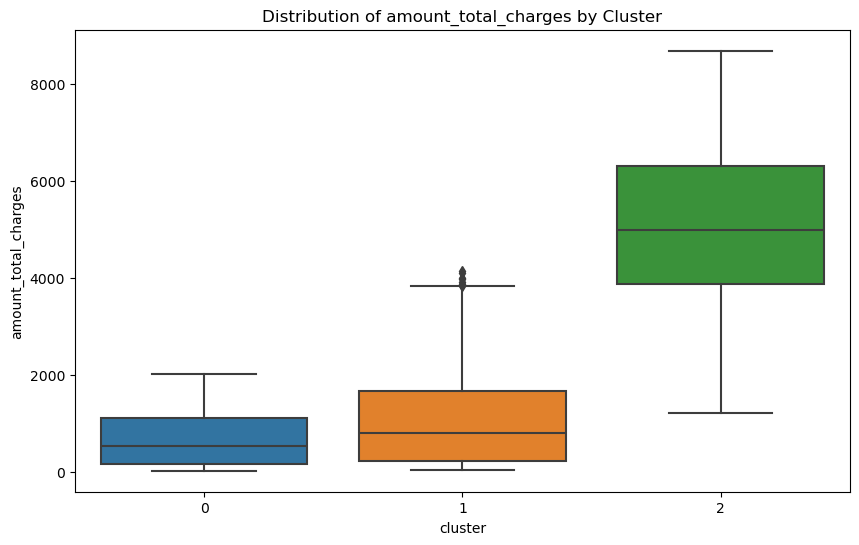

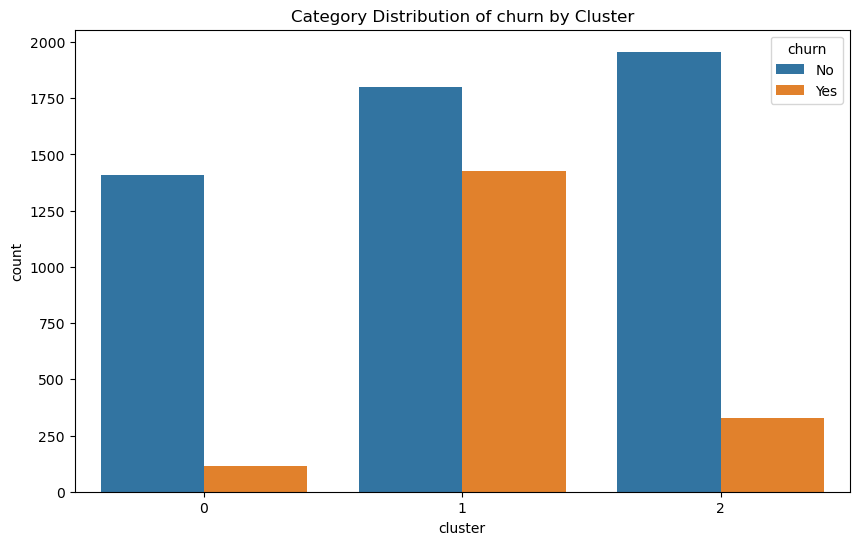

In [104]:
import pandas as pd
import numpy as np

cluster_df = pd.DataFrame({'id': id_column, 'cluster': clusters})

# Merge the clusters back into the original data
data_cluster = data.merge(cluster_df, on='id').drop(columns="id")

#data.drop(columns=["cluster_x", "cluster_y"], inplace=True)
data_cluster["customer_senior"] = data_cluster["customer_senior"].map({1: "Yes", 0: "No"})

cat_columns = [col for col in data_cluster.select_dtypes(include=object).columns]
num_columns = [col for col in data_cluster.select_dtypes(include=[np.int64, np.float64]).columns] + ["cluster"]

# Group by Cluster and Calculate Summary Statistics
cluster_summary = data_cluster[num_columns].groupby('cluster').mean()  # Mean values for numeric features by cluster
print("Cluster Summary (Mean):\n", cluster_summary)

# Step 3: Analyzing Categorical Features (e.g., counts or proportions within clusters)
#categorical_columns = data_cluster.select_dtypes(include=['object']).columns

for col in cat_columns:
    print(f"\nCategory distribution in cluster for {col}:")
    print(data_cluster.groupby('cluster')[col].value_counts(normalize=True))

# Step 4: Visualizations (e.g., boxplot to compare numeric distributions across clusters)
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature distributions across clusters
for feature in data_cluster.columns.drop(['cluster']):  # Exclude cluster label for grouping
    plt.figure(figsize=(10, 6))
    
    # Check if the feature is categorical or numerical
    if data_cluster[feature].dtype == 'object':
        # Categorical feature: draw a bar plot
        sns.countplot(data=data_cluster, x='cluster', hue=feature)
        plt.title(f'Category Distribution of {feature} by Cluster')
        plt.legend(title=feature)
    else:
        # Numerical feature: draw a box plot
        sns.boxplot(data=data_cluster, x='cluster', y=feature)
        plt.title(f'Distribution of {feature} by Cluster')
    
    plt.show()


In [162]:
data_cluster.to_csv("../data/data_cluster.csv", index=False)

## Prediction Model

Best models after running a GridSearch on Logistic Regression, Random Forest, SVM, XGBoost and LightGBM :
- Logistic Regression
- SVM

In [7]:
# Split back into train and test sets after clustering
X_train_transformed = X_transformed.iloc[:len(X_train_transformed), :]
X_test_transformed = X_transformed.iloc[len(X_train_transformed):, :]
X_train_transformed

,customer_senior_Yes,gender_Male,customer_partner_Yes,dependent_family_Yes,multiple_line_No phone service,multiple_line_Yes,internet_type_Fiber optic,internet_type_No,online_security_No internet service,online_security_Yes,...,contract_type_One year,contract_type_Two year,paperless_billing_Yes,payment_method_type_Credit card (automatic),payment_method_type_Electronic check,payment_method_type_Mailed check,month_tenure,amount_charges_monthly,amount_total_charges,cluster
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-0.468357,-0.002049,-0.421730,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.883777,1.073455,1.254246,2
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-1.287832,-1.378428,-1.002101,0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-1.164911,0.175817,-0.907313,0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-1.041990,0.154207,-0.782078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-1.287832,1.000314,-0.970483,0
5620,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,-0.386409,0.870655,-0.041033,2
5621,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-0.837121,-1.454893,-0.877220,1
5622,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-0.837121,1.148258,-0.482116,0


In [8]:
y_train_transformed

0       0.0
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
5619    1.0
5620    0.0
5621    0.0
5622    1.0
5623    0.0
Name: churn, Length: 5624, dtype: float64

#### XGBoost

In [9]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the initial model with some base parameters
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42, 
    eval_metric="logloss"
)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [500, 1000],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2],
    'gamma': [0, 0.1, 0.5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 2, 5]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',  # Use AUC-ROC as the scoring metric for binary classification
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train_transformed, y_train_transformed)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC-ROC Score:", grid_search.best_score_)

Fitting 5 folds for each of 3888 candidates, totalling 19440 fits


KeyboardInterrupt: 

In [10]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    max_depth=4,
    learning_rate=0.01,
    n_estimators=500,
    subsample=1.0,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    gamma=0.5,
    reg_alpha=0.1,
    reg_lambda=5,
    random_state=42, 
    eval_metric="logloss"
)

xgb_model.fit(X_train_transformed, y_train_transformed)

# Predict on test set and evaluate
y_pred_xgb = xgb_model.predict(X_test_transformed)
y_prob_xgb = xgb_model.predict_proba(X_test_transformed)[:, 1]
print("XGBoost Accuracy:", round(accuracy_score(y_test_transformed, y_pred_xgb), 2))
print("XGBoost AUC:", round(roc_auc_score(y_test_transformed, y_prob_xgb), 2))
print("Classification Report:\n", classification_report(y_test_transformed, y_pred_xgb))

XGBoost Accuracy: 0.81
XGBoost AUC: 0.86
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1035
         1.0       0.68      0.54      0.60       373

    accuracy                           0.81      1408
   macro avg       0.76      0.72      0.74      1408
weighted avg       0.80      0.81      0.80      1408



In [11]:
results_xgb = pd.DataFrame(
    {'ID': id_test, 
     'CHURN': y_test_transformed, 
     'CHURN_PREDICT': y_pred_xgb, 
     'CHURN_PROBA': y_prob_xgb}
     )

results_xgb['CHURN_PROBA'] = round(results_xgb['CHURN_PROBA'], ndigits=2)
results_xgb

,ID,CHURN,CHURN_PREDICT,CHURN_PROBA
0,1024-GUALD,1.0,1,0.70
1,0484-JPBRU,0.0,0,0.12
2,3620-EHIMZ,0.0,0,0.02
3,6910-HADCM,1.0,1,0.78
4,8587-XYZSF,0.0,0,0.02
...,...,...,...,...
1403,2845-KDHVX,0.0,0,0.02
1404,5027-YOCXN,0.0,0,0.26
1405,8884-MRNSU,0.0,0,0.04
1406,0567-XRHCU,0.0,0,0.02


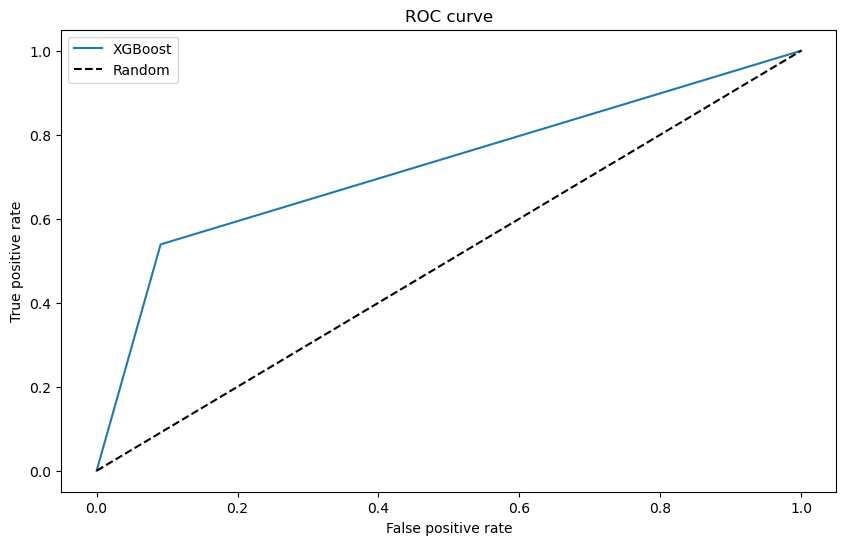

In [12]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve

#fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_transformed, y_proba_rf)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_transformed, y_pred_xgb)

plt.figure(figsize=(10, 6))
#plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

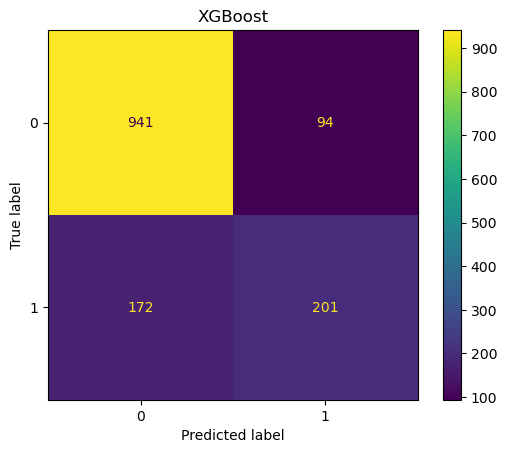

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#confusion_matrix_rf=confusion_matrix(y_test,y_predict_rf)
confusion_matrix_xgb=confusion_matrix(y_test_transformed,y_pred_xgb)



# Comparer les matrices de confusion
#fig, ax = plt.subplots(1, 1, figsize=(12, 6))

#disp_rf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf, display_labels=model_rf.classes_)
#disp_rf.plot(ax=ax[0])

disp_xgb = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot()

#ax[0].set_title('Random Forest')

plt.title('XGBoost')

plt.show()

#### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
log_model = LogisticRegression(
                            solver='liblinear',
                            C=10,
                            penalty='l2',
                            random_state=42
                            )
log_model.fit(X_train_transformed, y_train_transformed)

# Predict on test set and evaluate
y_pred_log = log_model.predict(X_test_transformed)
y_prob_log = log_model.predict_proba(X_test_transformed)[:, 1]
print("Logistic Regression Accuracy:", round(accuracy_score(y_test_transformed, y_pred_log), 2))
print("Logistic Regression AUC:", round(roc_auc_score(y_test_transformed, y_prob_log), 2))
print("Classification Report:\n", classification_report(y_test_transformed, y_pred_log))


Logistic Regression Accuracy: 0.82
Logistic Regression AUC: 0.86
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1035
         1.0       0.68      0.60      0.64       373

    accuracy                           0.82      1408
   macro avg       0.77      0.75      0.76      1408
weighted avg       0.81      0.82      0.82      1408



In [16]:
import numpy as np
import pandas as pd

# Assuming `log_model` is your fitted logistic regression model
coefficients = log_model.coef_[0]
odds_ratios = np.exp(coefficients)  # Convert coefficients to odds ratios

# Create a DataFrame to show feature names, coefficients, and odds ratios
feature_importance = pd.DataFrame({
    'Feature': X_transformed.columns,  # X being your feature DataFrame used in logistic regression
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
}, index=None).sort_values(by='Odds Ratio', ascending=False)

feature_importance

,Feature,Coefficient,Odds Ratio
4,multiple_line_No phone service,0.907367,2.477790
26,amount_total_charges,0.662776,1.940170
6,internet_type_Fiber optic,0.440138,1.552921
25,amount_charges_monthly,0.346101,1.413546
20,paperless_billing_Yes,0.337214,1.401039
22,payment_method_type_Electronic check,0.321796,1.379603
5,multiple_line_Yes,0.178390,1.195292
0,customer_senior_Yes,0.159673,1.173128
17,streaming_movie_Yes,0.151267,1.163307
2,customer_partner_Yes,0.059127,1.060910
